In [10]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image, ImageFilter
import random

import ultralytics
from ultralytics import YOLO
ultralytics.checks() 

Ultralytics YOLOv8.0.196  Python-3.9.18 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (16 CPUs, 31.4 GB RAM, 214.2/237.4 GB disk)


In [14]:
folder_path = 'D:/DL/Dataset/coco128/coco128/images/train2017'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

In [15]:
folder_path = 'D:/DL/Dataset/coco128/coco128/images/train2017'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print("No image files found in the folder.")
else:
    random_image = random.choice(image_files)
    random_image_path = os.path.join(folder_path, random_image)
    with Image.open(random_image_path) as img:
        width, height = img.size
        print(f"Random Image Size: {width}x{height}")

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        with Image.open(image_path) as img:
            resized_img = img.resize((640, 640), Image.LANCZOS)
            blurred_resized_img = resized_img.filter(ImageFilter.GaussianBlur(radius=2))
            blurred_resized_img.save(image_path)

    print("All images have been resized to 640 pixels width And Gassuan Blur Applied")

Random Image Size: 640x640
All images have been resized to 640 pixels width And Gassuan Blur Applied


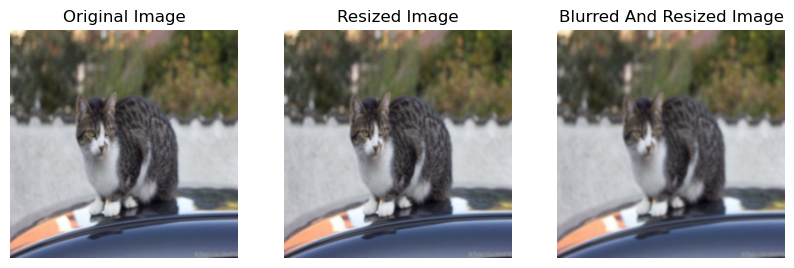

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(resized_img)
axs[1].set_title("Resized Image")
axs[1].axis('off')

axs[2].imshow(blurred_resized_img)
axs[2].set_title("Blurred And Resized Image")
axs[2].axis('off')

plt.show()

In [17]:
for i, image_file in enumerate(image_files):
    dst = f"img{str(i).zfill(3)}.jpg"
    src =f"{folder_path}/{image_file}"
    dst =f"{folder_path}/{dst}"
    os.rename(src, dst)

folder_path = 'D:/DL/Dataset/coco128/coco128/images/train2017'
for i, txt_file in enumerate(os.listdir(folder_path)):
    dst = f"img{str(i).zfill(3)}.txt"
    src =f"{folder_path}/{txt_file}"
    dst =f"{folder_path}/{dst}"
    os.rename(src, dst)

In [21]:
model = YOLO('yolov8n.pt')
results = model.train(data="D:/DL/Dataset/coco128/coco128/", imgsz=640, epochs=10, batch=16, save=True)

Ultralytics YOLOv8.0.196  Python-3.9.18 torch-2.0.0 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/DL/Dataset/coco128/coco128/, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

RuntimeError: Dataset 'D://DL/Dataset/coco128/coco128' error  [Errno 13] Permission denied: 'D:/DL/Dataset/coco128/coco128/'